# Predicting house prices from features like size, location (regression)

## Step 0: import packages


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Load Real Dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')
# !ls "/content/drive/MyDrive/Colab Notebooks/"

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks//data.csv")

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Size,Location,Price
0,1500,3,300000
1,1800,4,350000
2,2400,3,400000
3,3000,5,500000
4,3500,4,550000


# Step 2: Define Features and Target

In [11]:
X = df[['Size', 'Location']]
y = df['Price']

In [12]:
X

,Size,Location
0,1500,3
1,1800,4
2,2400,3
3,3000,5
4,3500,4
5,2100,3
6,1900,2
7,2300,4
8,3100,5
9,2800,1


In [13]:
y

,Price
0,300000
1,350000
2,400000
3,500000
4,550000
5,410000
6,320000
7,390000
8,520000
9,270000


# Step 3: Train-Test Split

Utility function from scikit-learn that helps you split your dataset into two parts:


1.   Training set: The part of the data the model learns from.
2.   Test set: The part of the data used to evaluate the model’s performance on unseen data.



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X and y are your features and target.
test_size=0.2 means 20% of the data is used for testing, 80% for training.
random_state=42 ensures reproducibility (same split every time you run it).

# Step 4: Train Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

finds the best-fit line (or hyperplane) that predicts a continuous target variable (i.e., house price) based on one or more input features (i.e., size and location).

Conceptually linear regression tries to model the relationship between your inputs X and output y using the equation

$$
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
$$

Where:



*   y is the target (e.g., house price),
*   x₁, x₂, ..., xₙ are the input features (e.g., size, location),
* β₀ is the intercept,
* β₁, β₂, ..., βₙ are the model coefficients (slopes),
* The model finds the values of these coefficients that minimize the error between predicted and actual values.

# Step 5: Predictions and Evaluation

In [16]:
y_pred = model.predict(X_test)
print("Model Evaluation:")
print("------------------")
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 2))
print("R² Score:", round(r2_score(y_test, y_pred), 2))
print()

Model Evaluation:
------------------
Mean Squared Error: 5435981562.11
R² Score: 0.12



The command:

**mean_squared_error(y_test, y_pred)**, computes the Mean Squared Error (MSE), which is a measure of how far the predicted values (y_pred) are from the actual values (y_test). It's calculated as the average of the squared differences between actual and predicted prices.

In other words, the loower MSE is the better predictions.

The command:

**r2_score(y_test, y_pred)** returns the R² Score (Coefficient of Determination) — a number between 0 and 1 that tells you how much of the variation in house prices your model explains.

R² = 1.0 → perfect predictions.
R² = 0.0 → model explains nothing (as bad as guessing the average).
R² < 0.0 → worse than guessing (bad model).

Interpretation:
If R² = 0.85, the model explains 85% of the variability in house prices.



# Step 6: New Prediction

In [17]:
new_house = np.array([[2600, 4]])
predicted_price = model.predict(new_house)
print("Prediction for New House:")
print("--------------------------")
print(f"Predicted Price for 2600 sqft, Location Score 4: ${predicted_price[0]:,.2f}")


Prediction for New House:
--------------------------
Predicted Price for 2600 sqft, Location Score 4: $438,815.55


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Step 7: Visualization

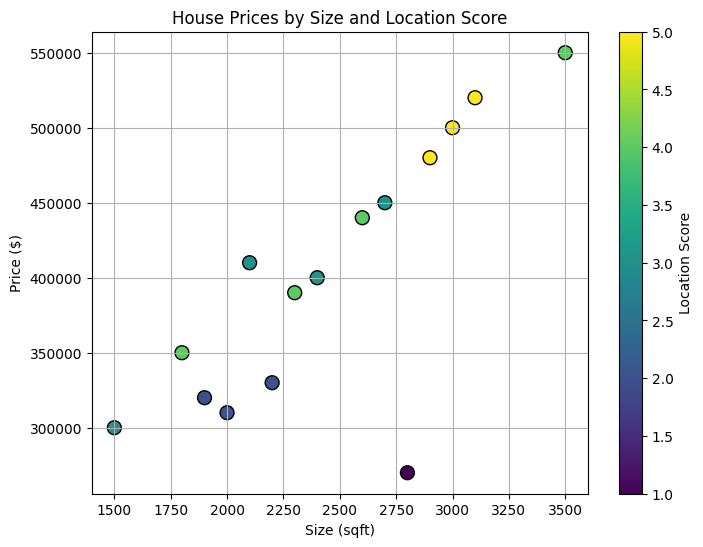

In [18]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df['Size'], df['Price'],
                      c=df['Location'], cmap='viridis', s=100, edgecolor='k')
plt.xlabel('Size (sqft)')
plt.ylabel('Price ($)')
plt.title('House Prices by Size and Location Score')
plt.colorbar(scatter, label='Location Score')
plt.grid(True)